
# Multilayer Perceptron (MLP) on Fashion-MNIST from scratch

This notebook demonstrates how to build a Multilayer Perceptron (MLP) from scratch and train it on the Fashion-MNIST dataset. 

## Key Steps:
    1. Load and preprocess the Fashion-MNIST dataset.
    2. Visualize the dataset.
    3. Training a Multiclass peceptron
    3. Implement an MLP model from scratch.
    4. Train and evaluate the model.
    5. Explore model performance and potential optimizations.


#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

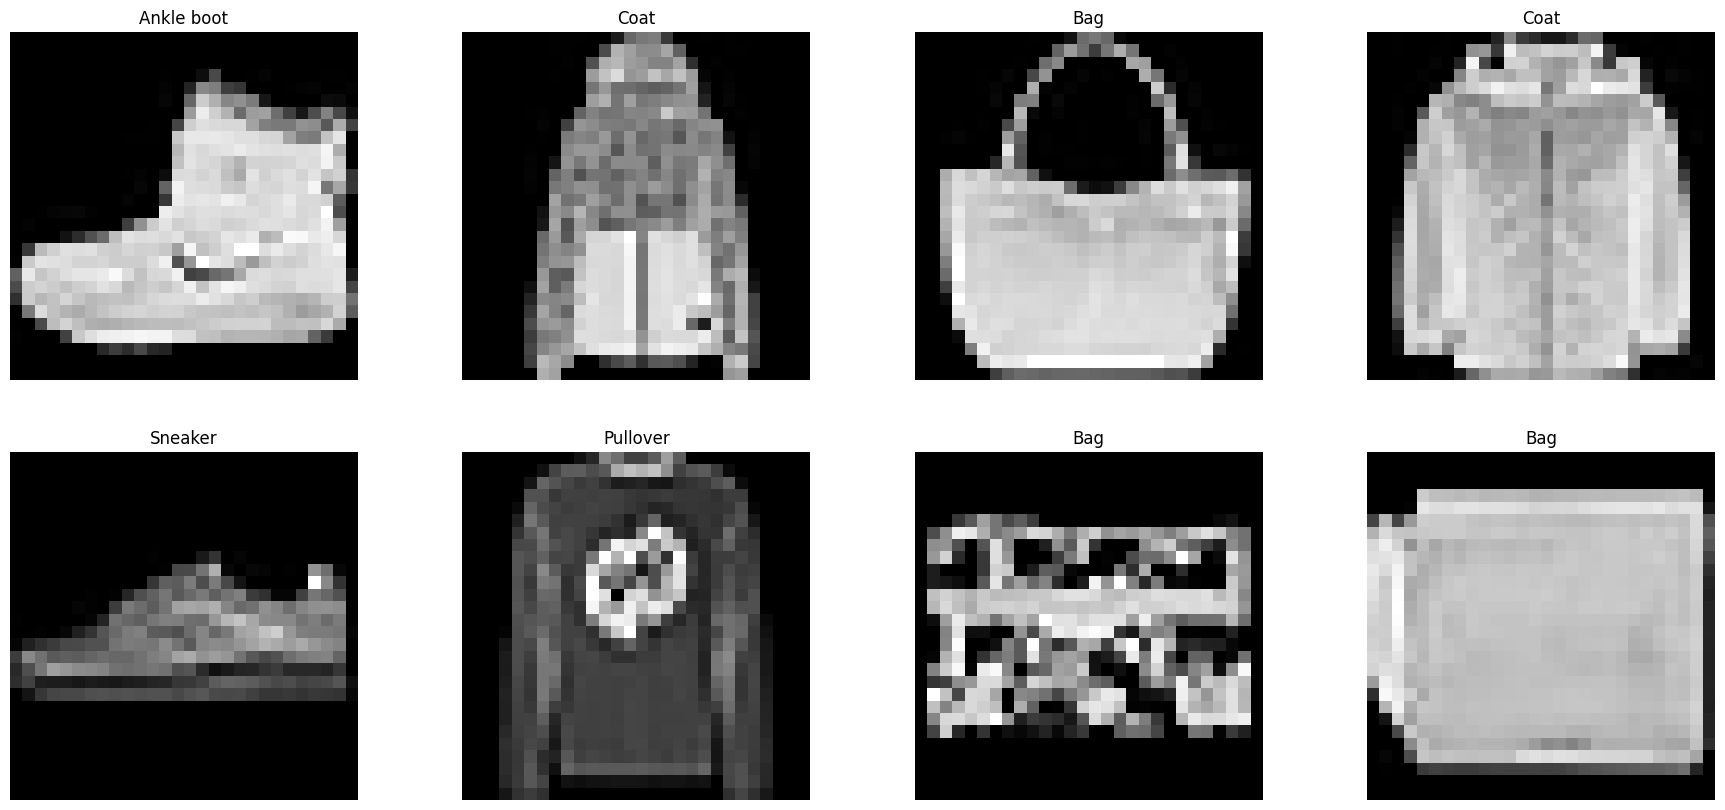

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

In [9]:
# Import necessary libraries for data preprocessing and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
# Random_state is set for reproducibility, ensuring the same split is obtained on each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling them to have a mean of 0 and a standard deviation of 1
# It helps the optimization algorithm converge faster and can improve the model's performance
scalar = StandardScaler()

# Fit and transform the training data to learn the mean and standard deviation
X_train_scaled = scalar.fit_transform(X_train)

# Transform the test data using the mean and standard deviation learned from the training data
# It ensures consistency in scaling between the training and test datasets
X_test_scaled = scalar.transform(X_test)

## Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

In [10]:
from sklearn.linear_model import Perceptron

# Create an instance of the Perceptron model
# The Perceptron is a simple linear classifier that learns a binary decision boundary
perceptron = Perceptron()

# Train the Perceptron model on the scaled training data
# The model learns the weights and bias to make predictions based on the input features
perceptron.fit(X_train_scaled, y_train)

# Make predictions on the test set using the trained Perceptron model
y_pred = perceptron.predict(X_test_scaled)

In [11]:
from sklearn.metrics import accuracy_score

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.81


The accuracy of 81% for a single peceptron is good.

T-shirt/top


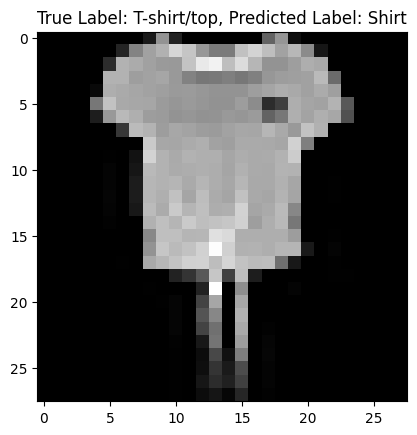

In [28]:
# Find a misclassified example
misclassified_index = np.where(y_pred != y_test)[0][5]

# Plot the misclassified example
plt.imshow(X_test[misclassified_index].reshape(28, 28), cmap="gray")
print(text_labels[int(y_test[misclassified_index])])

plt.title(f"True Label: {text_labels[int(y_test[misclassified_index])]}, Predicted Label: {text_labels[int(y_pred[misclassified_index])]}")
plt.show()

The predicted outcome of the above test case was Shirt and it does kind of look like a shirt. Though it's a T-shirt but with that resolution even an human can mis-classify it as a shirt.

### MultiClass Perceptron

A multi-class perceptron is an extension of the binary perceptron for handling problems with more than two classes. It's a simple neural network architecture used for multi-class classification.

In a multi-class perceptron, a separate binary perceptron is trained for each class. For each class, the binary perceptron is trained to distinguish instances of that class from instances of all other classes. For each class, there is a weight vector associated with it. The weight vector represents the parameters (weights) that the perceptron learns during training to make predictions for that specific class. During training, the perceptron learns the weight vectors by updating them based on the classification error for each class. The update is performed using a learning algorithm, such as stochastic gradient descent.

The perceptron uses an activation function to calculate the weighted sum of input features and weights. Commonly used activation functions include the step function or a variant of it.

To make a prediction for a given input, the model calculates the activation for each class and selects the class with the highest activation as the predicted class.

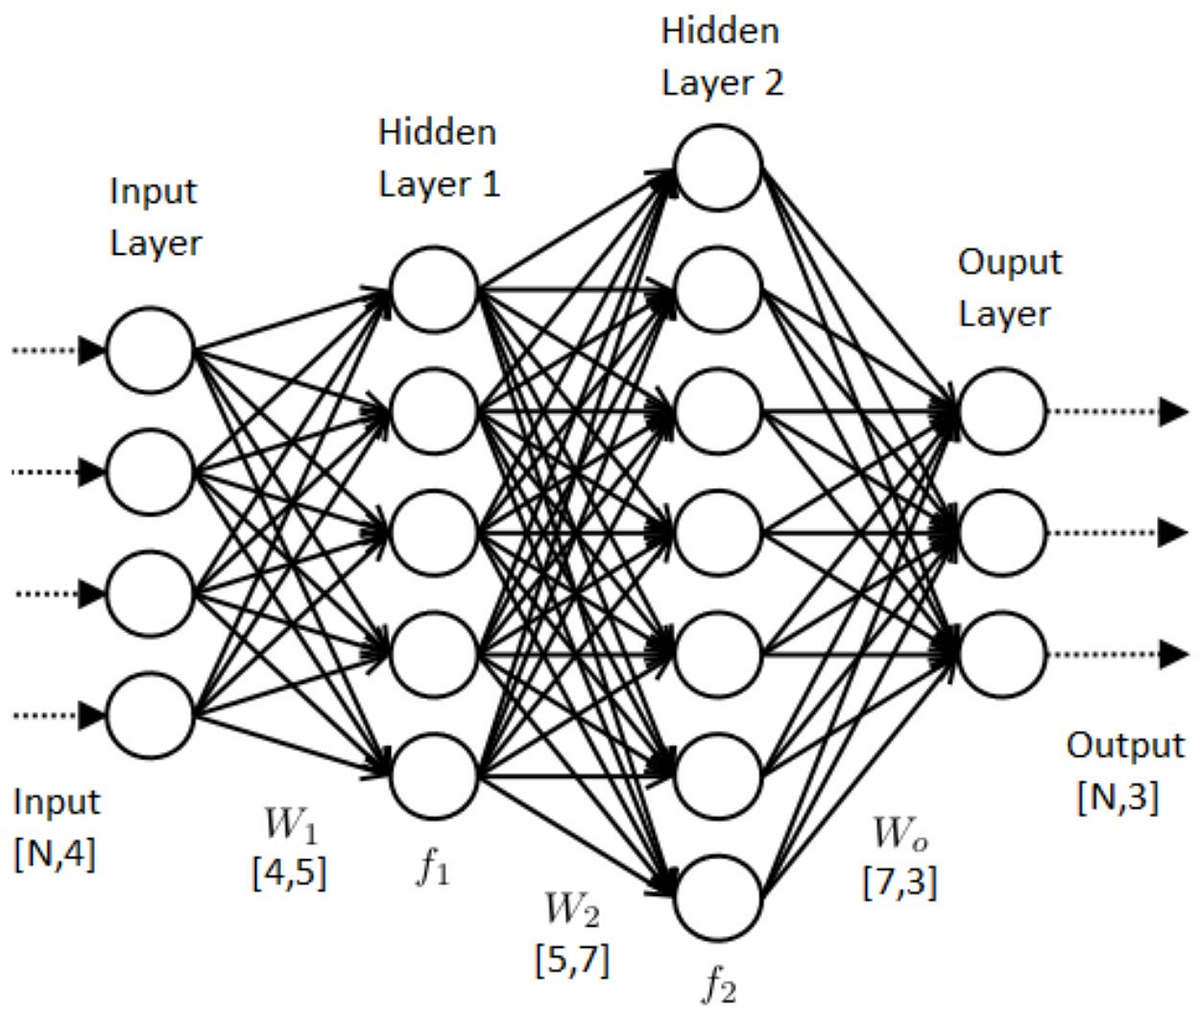

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Training a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

In [29]:
# Import the Multi-Layer Perceptron (MLP) model and accuracy_score metric
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the MLP model with specified parameters
# The hidden_layer_sizes parameter defines the architecture, (20,) means one hidden layer with 20 neurons
# The alpha parameter is the L2 regularization term, verbose enables printing information during training
# Random_state ensures reproducibility of the results
mlp = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.1, verbose=1, random_state=1)

# Train the MLP model on the scaled training data
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set using the trained MLP model
y_pred_mlp = mlp.predict(X_test_scaled)

Iteration 1, loss = 0.63982681
Iteration 2, loss = 0.43309333
Iteration 3, loss = 0.39753066
Iteration 4, loss = 0.37727725
Iteration 5, loss = 0.36473861
Iteration 6, loss = 0.35406314
Iteration 7, loss = 0.34652351
Iteration 8, loss = 0.34180317
Iteration 9, loss = 0.33441681
Iteration 10, loss = 0.33036474
Iteration 11, loss = 0.32661593
Iteration 12, loss = 0.32187934
Iteration 13, loss = 0.31980492
Iteration 14, loss = 0.31658098
Iteration 15, loss = 0.31249897
Iteration 16, loss = 0.31143816
Iteration 17, loss = 0.30885581
Iteration 18, loss = 0.30687183
Iteration 19, loss = 0.30333655
Iteration 20, loss = 0.30351777
Iteration 21, loss = 0.30051948
Iteration 22, loss = 0.29833242
Iteration 23, loss = 0.29844625
Iteration 24, loss = 0.29638867
Iteration 25, loss = 0.29463795
Iteration 26, loss = 0.29338758
Iteration 27, loss = 0.29279986
Iteration 28, loss = 0.29166540
Iteration 29, loss = 0.29030085
Iteration 30, loss = 0.28960588
Iteration 31, loss = 0.28718995
Iteration 32, los

In [30]:
from sklearn.metrics import accuracy_score

# Calculate and print the training and test accuracy
train_accuracy = accuracy_score(y_train, mlp.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred_mlp)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.93
Test Accuracy: 0.87


#### Size of the Input Layer:

The size of the input layer is determined by the number of features in the MNIST dataset i.e. the number of pixels in an image. In MNIST dataset, each image is a 28x28 pixel grid, then the size of the input layer is 28 * 28 = 784.

#### Size of the Output Layer:

The size of the output layer is determined by the number of classes in the classification problem. In out case, that is 10. So, the size of the output layer is 10.

#### Total Number of Weights:

The total number of weights is calculated by considering the connections between neurons in the input layer, hidden layer, and output layer. In this case, the input layer has 784 neurons, the hidden layer has 20 neurons, and the output layer has 10 neurons. The number of weights between the input and hidden layers is 784 * 20, and the number of weights between the hidden and output layers is 20 * 10. Therefore, the total number of weights is 784 * 20 + 20 * 10 i.e. 15880.

#### Difference Between Training and Test Accuracy:

- The training accuracy represents the performance of the model on the training dataset, which is the data it has seen during the training process. The test accuracy represents the performance of the model on a separate dataset that it has not seen during training, providing an estimate of how well the model generalizes to new, unseen data.
- If the training accuracy is significantly higher than the test accuracy, it may indicate overfitting, where the model has memorized the training data but fails to generalize to new data. Balancing the training and test accuracies is essential to ensure that the model is learning patterns that are applicable beyond the training set.

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

In [37]:
# Import necessary libraries for model evaluation and configuration
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Define a range of hidden layer widths to experiment with
widths = [20, 50, 80, 100, 150, 200]

# Lists to store training and test accuracies for each width
train_accuracies = []
test_accuracies = []

# Iterate over different widths to explore the impact on model performance
for width in widths:
    # Create an instance of the MLP model with specified width and other hyperparameters
    # The alpha parameter is the L2 regularization term, and random_state ensures reproducibility
    mlp = MLPClassifier(hidden_layer_sizes=(width,), alpha=0.001, random_state=42)

    # Train the MLP model on the scaled training data
    mlp.fit(X_train_scaled, y_train)

    # Calculate training and test accuracies for the current width
    train_accuracy = accuracy_score(y_train, mlp.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))

    # Append accuracies to lists for later analysis and comparison
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print the training and test accuracies for the current width
    print(f"Hidden Layer Width: {width}, Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Width: 20, Training Accuracy: 0.96, Test Accuracy: 0.86
Hidden Layer Width: 50, Training Accuracy: 1.00, Test Accuracy: 0.87
Hidden Layer Width: 80, Training Accuracy: 1.00, Test Accuracy: 0.88
Hidden Layer Width: 100, Training Accuracy: 0.99, Test Accuracy: 0.88
Hidden Layer Width: 150, Training Accuracy: 0.99, Test Accuracy: 0.89
Hidden Layer Width: 200, Training Accuracy: 0.99, Test Accuracy: 0.89


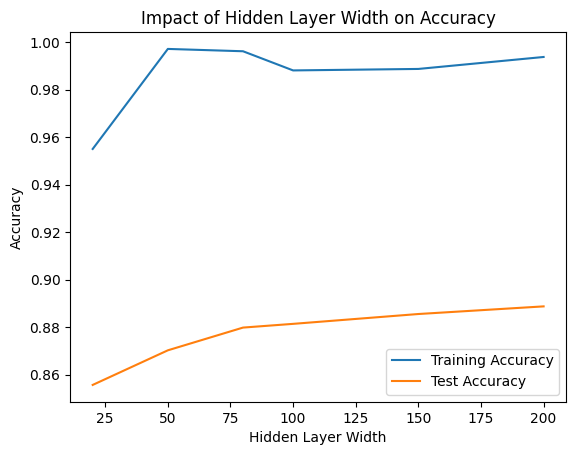

In [38]:
import matplotlib.pyplot as plt

# Plotting the results
plt.plot(widths, train_accuracies, label='Training Accuracy')
plt.plot(widths, test_accuracies, label='Test Accuracy')
plt.xlabel('Hidden Layer Width')
plt.ylabel('Accuracy')
plt.title('Impact of Hidden Layer Width on Accuracy')
plt.legend()
plt.show()



#### Training Time Observation:

The number of neurons increared the training time also increased with it.
This might be because when we increase the number of neurons, the model becomes more complex and training may take longer. Also, a larger number of neurons results in more weights to be learned, leading to a more computationally intensive training process.

#### Inference from the Graph:


Performance vs. Neurons: The initially increasing the number of neurons improves both training and test accuracy. However, after a certain point (layer width 80), increasing the number of neurons lead to diminishing returns. That means even doubling the width wouldn't give as high of a difference as it did with lower widths.

Optimal Number of Neurons: In my opinion, preceptron with width of 100 gives a sweet spot between the trade off of accuracy and complexity.


#### Analysis for Optimal Solution:

- Best Number of Neurons: The best number of neurons is with 100 neurons in hidden layer. It's the point where the model generalizes well without showing signs of overfitting. It's still not evidently overfitting but still after 100 width, we don't have the test accuracy platues.

- Number of Weights for Optimal Solution:
Input to hidden layer = 28 * 28 * 100
Hidden Layer to Output layer = 100*10
Therefore, total weights = 74000 + 1000 = 75000

#### Evidence of Overfitting:
Evidence of overfitting can be observed as there is a significant gap between training and test accuracy. If the training accuracy is much higher than the test accuracy, it suggests that the model is too complex and is memorizing noise in the training data.

Addressing Overfitting:
- we can Reduce Model Complexity: Decrease the number of neurons in the hidden layer.
- Regularization: we can increase the regularization strength (alpha parameter) to penalize large weights.

## The deeper Networks the better! (Well, in some cases)

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

In [40]:
layers = ((20,20),(20,20,20),(50,20),(20,50,20),(100,50),(100,100,50))

# Lists to store training and test accuracies for each layer
train_accuracies = []
test_accuracies = []

# Iterate over different layer
for layer in layers:
    # Create and train the MLP model on the scaled data
    mlp = MLPClassifier(hidden_layer_sizes=layer, alpha=0.001, random_state=42)
    mlp.fit(X_train_scaled, y_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, mlp.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))

    # Append accuracies to lists for later analysis and comparision
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Hidden Layer Architecture: {layer}, Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Architecture: (20, 20), Training Accuracy: 0.97, Test Accuracy: 0.86
Hidden Layer Architecture: (20, 20, 20), Training Accuracy: 0.96, Test Accuracy: 0.86
Hidden Layer Architecture: (50, 20), Training Accuracy: 0.99, Test Accuracy: 0.87
Hidden Layer Architecture: (20, 50, 20), Training Accuracy: 0.97, Test Accuracy: 0.86
Hidden Layer Architecture: (100, 50), Training Accuracy: 0.99, Test Accuracy: 0.88
Hidden Layer Architecture: (100, 100, 50), Training Accuracy: 0.99, Test Accuracy: 0.89


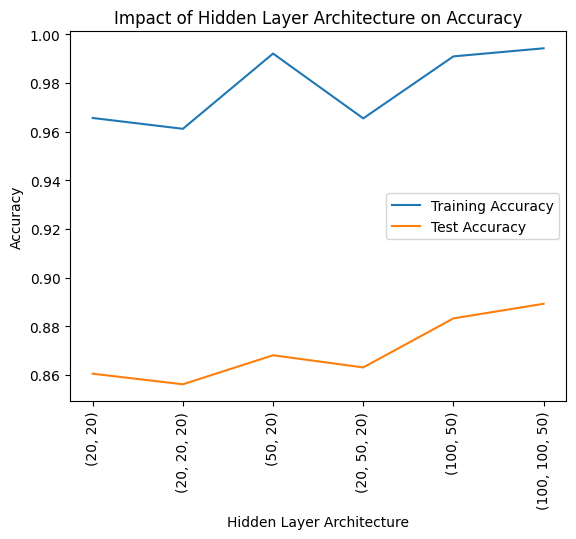

In [41]:
import matplotlib.pyplot as plt

# Plotting the results
plt.plot(range(len(layers)), train_accuracies, label='Training Accuracy')
plt.plot(range(len(layers)), test_accuracies, label='Test Accuracy')
plt.xticks(range(len(layers)), [str(layer) for layer in layers], rotation='vertical')
plt.xlabel('Hidden Layer Architecture')
plt.ylabel('Accuracy')
plt.title('Impact of Hidden Layer Architecture on Accuracy')
plt.legend()
plt.show()


#### inference from the Graph:

- The test accuracies for different hidden layer architectures provide insights into the trade-off between model complexity and generalization performance.
- The model with the architecture (100, 100, 50) achieved the highest test accuracy of 0.89, indicating good generalization to unseen data.
- It seems that increasing the number of neurons or layers beyond a certain point does not consistently improve test accuracy and may even lead to overfitting.
- The Gap between the test accuracy and the train accuracy is the lowest at (100,100,50) width which indicates that the model performs comparitivitely good with test data as on training data.

#### Number of Neurons in the best perfromer:

In my case, the best perfomer on single layer perceptron was 100 neurons wide and after creating deeper network the best perform still have 2 layers that are 100 neurons wide. However, it's true that based on the performance of both the 100 neuron wide network, the deeper network with (100,100,50) architecture performs much better

#### Number of weights:

A deeper network with fewer neurons might have fewer weights compared to a wider network, which typically requires more weights due to the increased number of connections. Based on my top performer (100,100,50) layer structure, it's weigth are as follows:

1. Input to 1st hidden = 784*100
2. 1st hidden layer to 2nd hidden layer = 100*100
3. 2nd hidden layer to 3rd hidden layer = 100*50
5. 3rd hidden layer to output = 50*10

Total weights = 78400 + 10000 + 5000 + 500 = 93900

## Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create and train the best-performing MLP model
best_model = MLPClassifier(hidden_layer_sizes=(100, 100, 50), alpha=0.001, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_best_model = best_model.predict(X_test_scaled)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_best_model)

In [52]:
cm

array([[1228,    2,   20,   28,    5,    2,   97,    0,   12,    0],
       [   1, 1385,    2,    8,    2,    1,    1,    0,    2,    0],
       [  36,    0, 1135,   18,  116,    4,   93,    0,    5,    0],
       [  45,   18,   14, 1278,   49,    0,   38,    0,    7,    0],
       [   6,    3,  109,   34, 1111,    1,   89,    0,    4,    0],
       [   1,    0,    0,    1,    0, 1411,    0,   27,    1,    8],
       [ 216,    5,  111,   37,   68,    1,  955,    0,   14,    0],
       [   0,    0,    0,    0,    1,   27,    0, 1312,    1,   18],
       [   5,    2,    2,    4,    7,   12,    8,    2, 1299,    1],
       [   0,    0,    0,    0,    0,   33,    0,   65,    0, 1336]])

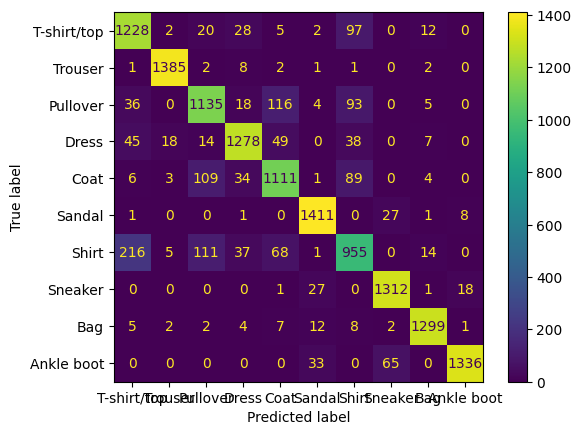

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_labels)
disp.plot()

plt.show()

In the confusion matrix:

Rows represent the true labels.
Columns represent the predicted labels.
Each cell at position (i, j) represents the number of instances of class i that were predicted as class j.

Interpretation:

Diagonal elements (top-left to bottom-right) represent correctly classified instances.
Off-diagonal elements represent misclassifications.
The darker the color, the higher the count of instances.

Observation:
- **T-shirt/top (Class 0):**
  - High true positive count (1228).
  - Some misclassifications as Pullover (20), Shirt (97), and others.

- **Trouser (Class 1):**
  - High true positive count (1385).
  - Low misclassifications.

- **Pullover (Class 2):**
  - Some misclassifications as T-shirt/top (36), Dress (116), and Shirt (93).

- **Dress (Class 3):**
  - High true positive count (1278).
  - Some misclassifications as T-shirt/top (45), Pullover (14), and others.

- **Coat (Class 4):**
  - Some misclassifications as T-shirt/top (6), Pullover (109), and others.

- **Sandal (Class 5):**
  - High true positive count (1411).
  - Some misclassifications as Shirt (27), Sneaker (1), and others.

- **Shirt (Class 6):**
  - Some misclassifications as T-shirt/top (216), Pullover (111), and others.

- **Sneaker (Class 7):**
  - High true positive count (1312).
  - Some misclassifications as Sandal (27), Bag (1), and others.

- **Bag (Class 8):**
  - High true positive count (1299).
  - Some misclassifications as T-shirt/top (5), Pullover (8), and others.

- **Ankle boot (Class 9):**
  - High true positive count (1336).
  - Some misclassifications as Sneaker (65), Sandal (33), and others.

- **Overall:**
  - The model appears to perform well on certain classes (e.g., Trouser, Sandal, Ankle boot) but struggles with others (e.g., Shirt, Pullover).
  - Shirts are office missclassifed as t-shirt as we have seen in the first example at top of this notebook which also makes sense intuitively
  - Cloths that are similar like Coats, T-shirts, shirts are often missclassifed as maybe because they look a lot similar.

